In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
dataFrame= pd.read_csv("Admission_Predict.csv")
#first 5 rows
dataFrame.head()   

#last 5 rows
#dataFrame.tail() 

#(no. of rows, no. of columns)
#dataFrame.shape 

#column names
# dataFrame.columns

#count of non-null variables & datatypes
# dataFrame.info() 

#stats
# dataFrame.describe() 

#missing values
# dataFrame.isnull().sum()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [76]:
# features
x= dataFrame[['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA', 'Research']]
y= dataFrame['Chance of Admit ']

#splitting the data into 80% training and 20% testing examples (42 can be replaced by any integer, it's just the seed for random)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

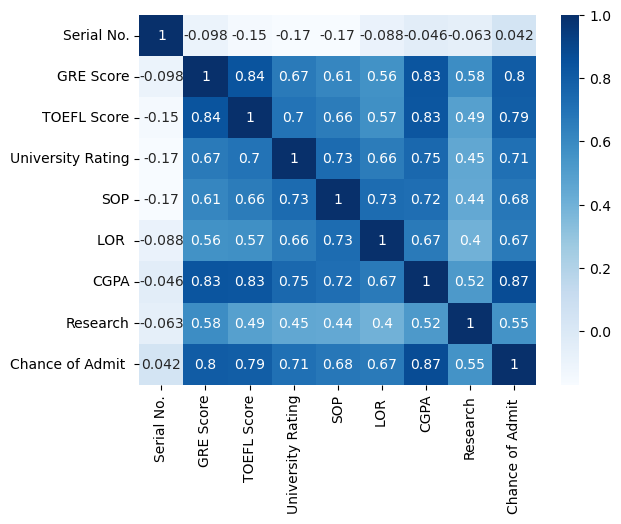

In [78]:
sns.heatmap(dataFrame.corr(), annot=True, cmap='Blues')
plt.show()

In [82]:
model= LinearRegression()
model.fit(x_train, y_train)

y_predict= model.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_predict))
print("R² Score:", r2_score(y_test, y_predict))


MSE: 0.005045298180475928
R² Score: 0.8046227019804263


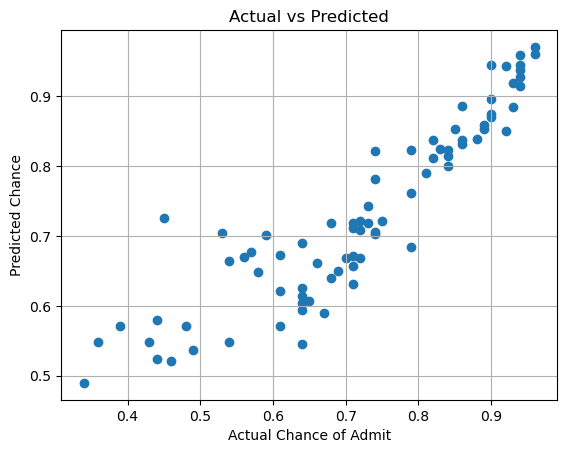

In [84]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [68]:
#sample_features = [[325, 112, 4, 9.2, 1]]  # GRE, TOEFL, University Rating, CGPA, Research
sample_features = [[300, 100, 3, 8.0, 1]]

prediction= model.predict(sample_features)
print("Predicted chance of admit:", round(prediction[0]*100, 2), "%")


chance = prediction[0]

if chance >= 0.85:
    print("Target: MIT, Stanford, Berkeley")
elif chance >= 0.7:
    print("Target: UCLA, Georgia Tech, Purdue")
elif chance >= 0.5:
    print("Target: SUNY Buffalo, UIC, ASU")
else:
    print("Target: CSU Long Beach, NJIT, UMass Lowell")


Predicted chance of admit: 61.26 %
Target: SUNY Buffalo, UIC, ASU


C:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
